<a href="https://colab.research.google.com/github/Sompoch-T/dads6003/blob/main/02_logistic_regression_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install requests
!pip install lxml
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 6.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for TA-Lib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for TA-Lib
Failed to build TA-Lib
ERROR: Could not build wheels for TA-Lib, which is required to install pyproject.toml-based projects


In [16]:
# Data Manipulation
import numpy as np
import pandas as pd
import yfinance as yf


# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [94]:
tsla = yf.Ticker('TSLA')
interval = '1h'
start = '2023-1-1'
end = '2023-12-1'
df = tsla.history(interval=interval,start=start,end=end)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-01-03 09:30:00-05:00,118.470001,118.800003,110.350700,111.059998,65615599,0.0,0.0
2023-01-03 10:30:00-05:00,111.050003,112.239998,108.050003,108.470100,33929104,0.0,0.0
2023-01-03 11:30:00-05:00,108.472397,108.495003,105.599998,106.150002,33451392,0.0,0.0
2023-01-03 12:30:00-05:00,106.148804,106.475998,104.639999,105.669998,24087601,0.0,0.0
2023-01-03 13:30:00-05:00,105.669998,107.449997,105.340103,107.320000,23360158,0.0,0.0


In [95]:
df['S_10'] = df['Close'].rolling(window=24).mean()
df['Corr'] = df['Close'].rolling(window=24).corr(df['S_10'])
df['ROC'] = df['Close']/(df['Close'].shift(24))
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:9]

In [96]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [97]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [98]:
model = LogisticRegression()
model = model.fit (X_train,y_train)

In [99]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[9.390605248267381e-14]
1,High,[9.394836450256848e-14]
2,Low,[9.346112004878636e-14]
3,Close,[9.346309260472079e-14]
4,Volume,[3.4904290279879348e-09]
5,Dividends,[0.0]
6,Stock Splits,[0.0]
7,S_10,[9.220294149044065e-14]
8,Corr,[1.0792338176504464e-16]


In [100]:
# Specify the date for prediction
prediction_date = '2023-12-22'
probability = model.predict_proba(X_test)
print(probability)

[[0.48912435 0.51087565]
 [0.49329288 0.50670712]
 [0.47037778 0.52962222]
 [0.48543127 0.51456873]
 [0.48590045 0.51409955]
 [0.48958802 0.51041198]
 [0.49150474 0.50849526]
 [0.49232259 0.50767741]
 [0.49400042 0.50599958]
 [0.46673589 0.53326411]
 [0.47729789 0.52270211]
 [0.48476525 0.51523475]
 [0.48900426 0.51099574]
 [0.48930161 0.51069839]
 [0.48816955 0.51183045]
 [0.49157291 0.50842709]
 [0.46625969 0.53374031]
 [0.48444148 0.51555852]
 [0.48416901 0.51583099]
 [0.48967692 0.51032308]
 [0.48803621 0.51196379]
 [0.48921666 0.51078334]
 [0.49399142 0.50600858]
 [0.47291964 0.52708036]
 [0.48364681 0.51635319]
 [0.48747983 0.51252017]
 [0.48957995 0.51042005]
 [0.49249658 0.50750342]
 [0.4925198  0.5074802 ]
 [0.49213045 0.50786955]
 [0.4694415  0.5305585 ]
 [0.47912398 0.52087602]
 [0.48593139 0.51406861]
 [0.49009409 0.50990591]
 [0.48602916 0.51397084]
 [0.48673565 0.51326435]
 [0.4913213  0.5086787 ]
 [0.46256723 0.53743277]
 [0.48307843 0.51692157]
 [0.48671521 0.51328479]


In [101]:
predicted = model.predict(X_test)

In [102]:
print(predicted)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [103]:
print(X_test.index[0])

2023-08-25 14:30:00-04:00


In [104]:
# Find the dates with predicted buy signals (Signal = 1)
# buy_signal_dates = predicted[predicted_labels == 1]

buy_signal_dates = []

for idx, val in enumerate(predicted):
  if val == 1:
    buy_signal_dates.append(X_test.index[idx])
# Print the date(s) with buy signal(s)
print("\nDate(s) with Buy Signal(s):")
for _,val in enumerate(buy_signal_dates):
  print(val)


Date(s) with Buy Signal(s):
2023-08-25 14:30:00-04:00
2023-08-25 15:30:00-04:00
2023-08-28 09:30:00-04:00
2023-08-28 10:30:00-04:00
2023-08-28 11:30:00-04:00
2023-08-28 12:30:00-04:00
2023-08-28 13:30:00-04:00
2023-08-28 14:30:00-04:00
2023-08-28 15:30:00-04:00
2023-08-29 09:30:00-04:00
2023-08-29 10:30:00-04:00
2023-08-29 11:30:00-04:00
2023-08-29 12:30:00-04:00
2023-08-29 13:30:00-04:00
2023-08-29 14:30:00-04:00
2023-08-29 15:30:00-04:00
2023-08-30 09:30:00-04:00
2023-08-30 10:30:00-04:00
2023-08-30 11:30:00-04:00
2023-08-30 12:30:00-04:00
2023-08-30 13:30:00-04:00
2023-08-30 14:30:00-04:00
2023-08-30 15:30:00-04:00
2023-08-31 09:30:00-04:00
2023-08-31 10:30:00-04:00
2023-08-31 11:30:00-04:00
2023-08-31 12:30:00-04:00
2023-08-31 13:30:00-04:00
2023-08-31 14:30:00-04:00
2023-08-31 15:30:00-04:00
2023-09-01 09:30:00-04:00
2023-09-01 10:30:00-04:00
2023-09-01 11:30:00-04:00
2023-09-01 12:30:00-04:00
2023-09-01 13:30:00-04:00
2023-09-01 14:30:00-04:00
2023-09-01 15:30:00-04:00
2023-09-0

In [105]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[  0 229]
 [  0 238]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       229
           1       0.51      1.00      0.68       238

    accuracy                           0.51       467
   macro avg       0.25      0.50      0.34       467
weighted avg       0.26      0.51      0.34       467



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


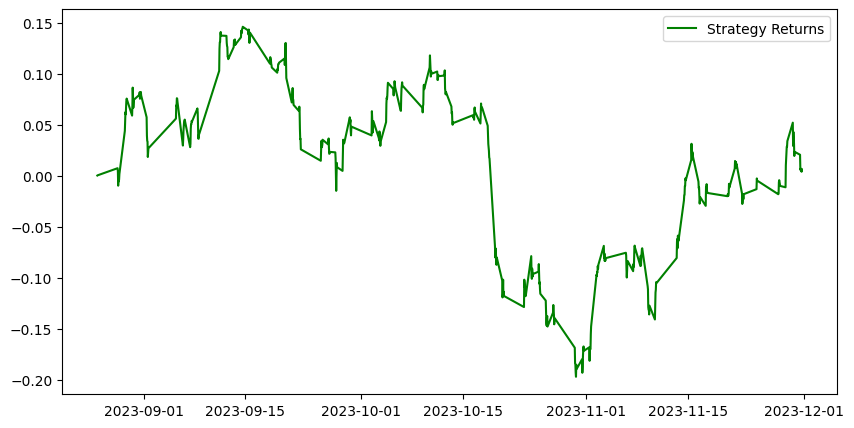

In [106]:
df['Predicted_Signal'] = model.predict(X)
df['AAPL_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_AAPL_returns = np.cumsum(df[split:]['AAPL_returns'])


df['Strategy_returns'] = df['AAPL_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Strategy_returns'])
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()